In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np
file=open('ad_conversion.csv')
ad_conversion= pd.read_csv(file)

we'll use linear regression models to make predictions on Facebook advert clicks

In [2]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


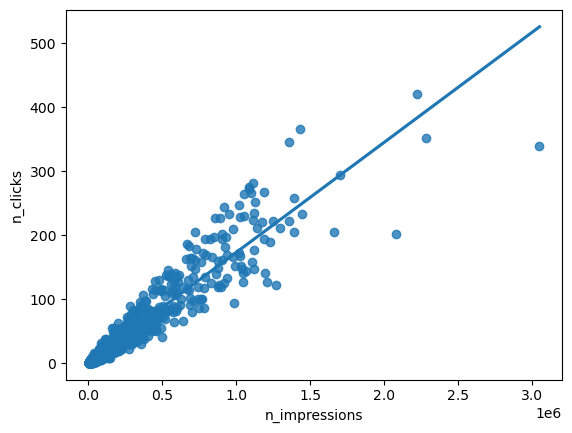

In [3]:
plt.figure()
# Plot variables
sns.regplot(x='n_impressions',y='n_clicks',data=ad_conversion,ci=None)
plt.show()

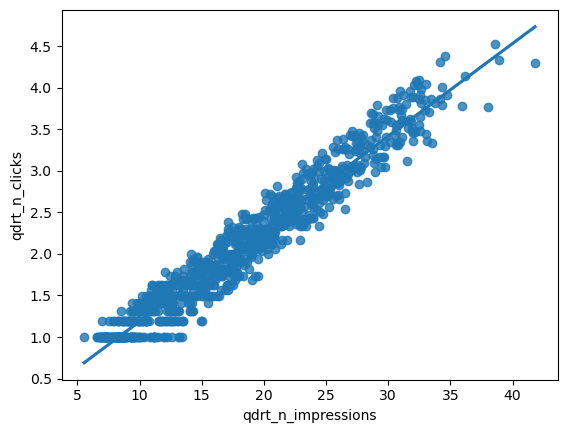

In [4]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions']**0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks']**0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions',y='qdrt_n_clicks',data=ad_conversion,
ci=None)
plt.show()

In [12]:

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


C:\Users\Mahsa\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


Back transformation
In order to correctly interpret and visualize our predictions, we'll need to do a back-transformation.

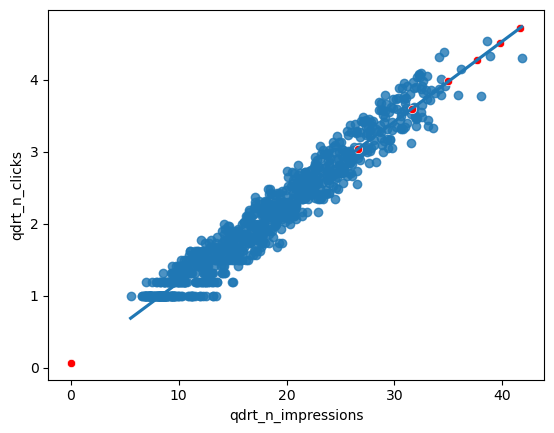

In [9]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color='red')
plt.show()

quantify how well a linear regression model fits and diagnose model problems using visualizations

Coefficient of determination
The coefficient of determination is a measure of how well the linear regression line fits the observed values.

In [11]:
mdl_click_vs_impression_orig=ols("n_clicks ~ n_impressions", data=ad_conversion, ci=None).fit()
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:25:36   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

C:\Users\Mahsa\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)
C:\Users\Mahsa\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


In [13]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


The transformed model gives a better fit and incicates The number of impressions explains 94% of the variability in the number of clicks.

Residual standard error
Residual standard error (RSE) is a measure of the typical size of the residuals.
Equivalently, it's a measure of how wrong you can expect predictions to be.

In [14]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


diagnostic plots of residuals versus fitted values for two models on advertising conversion.

In [ ]:
#original model

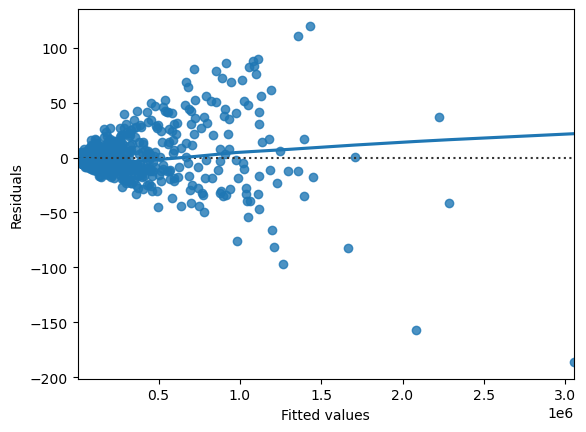

In [15]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_impressions', y='n_clicks', data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

In [ ]:
#transformed model

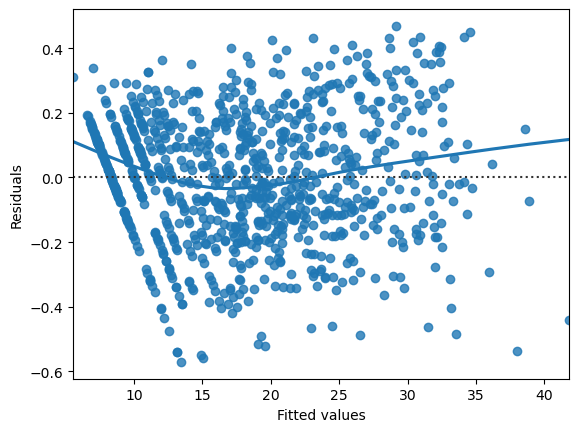

In [16]:
# Plot the residuals vs. fitted values
sns.residplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

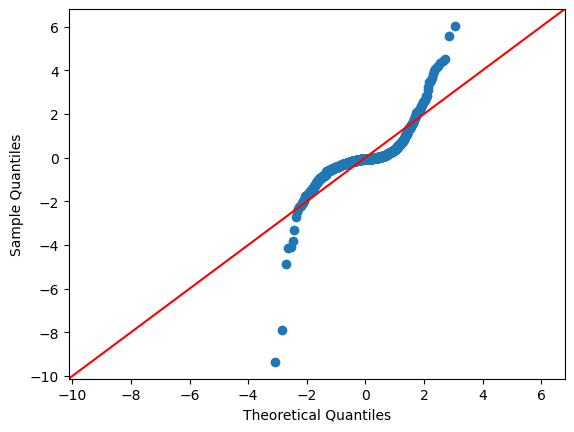

In [17]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_click_vs_impression_orig.resid, fit=True, line="45")

# Show the plot
plt.show()

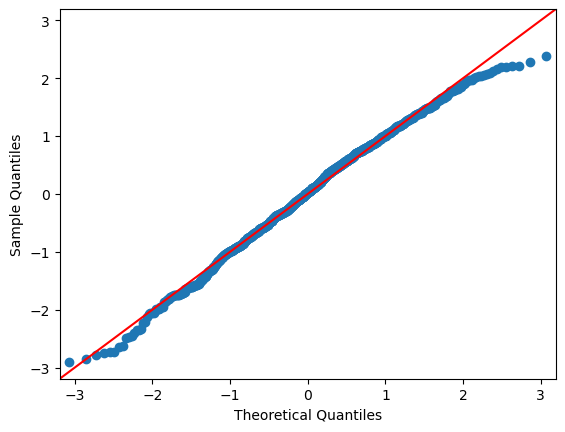

In [18]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_click_vs_impression_trans.resid, fit=True, line="45")

# Show the plot
plt.show()

 scale-location plot

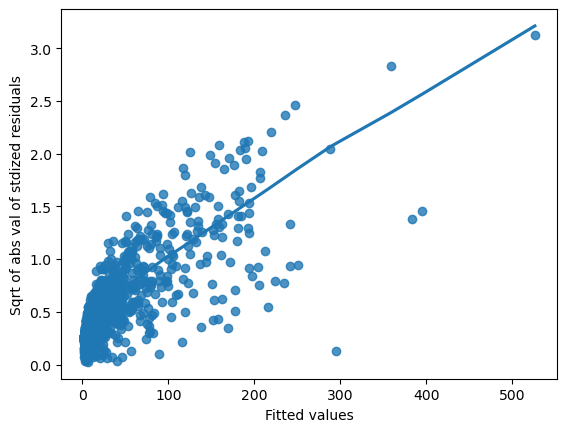

In [20]:
# Preprocessing steps
model_norm_residuals = mdl_click_vs_impression_orig.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_click_vs_impression_orig.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

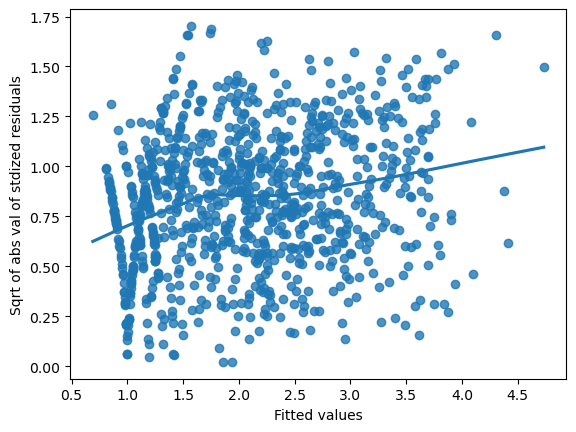

In [21]:
# Preprocessing steps
model_norm_residuals = mdl_click_vs_impression_trans.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_click_vs_impression_trans.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

Extracting leverage and influence
Leverage measures how unusual or extreme the explanatory variables are for each observation.
Influence measures how much a model would change if each observation was left out of the model calculations, one at a time.

In [26]:
# Create summary_info
summary_info = mdl_click_vs_impression_trans.get_influence().summary_frame()
# Add the hat_diag column to ad-conversion, name it leverage
ad_conversion["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(ad_conversion.sort_values('leverage',ascending=False).head())

# Add the cooks_d column to ad-conversion, name it cooks_dist
ad_conversion['cooks_dist']=summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(ad_conversion.sort_values('cooks_dist',ascending=False).head())

      spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks  \
329  639.949998        3052003       340           41.797109       4.294076   
562  603.380002        2286228       353           38.884801       4.334547   
656  612.300003        2223278       421           38.614325       4.529711   
332  360.150001        2080666       202           37.979618       3.769970   
663  429.479998        1705246       295           36.136556       4.144341   

     leverage  
329  0.012458  
562  0.009837  
656  0.009611  
332  0.009092  
663  0.007677  
      spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks  \
332  360.150001        2080666       202           37.979618       3.769970   
329  639.949998        3052003       340           41.797109       4.294076   
328  236.769999        1267550       123           33.553766       3.330246   
819  541.700002        1428421       367           34.571168       4.376899   
788  465.079998        1358324    